<a href="https://colab.research.google.com/github/ericfruchi/Portfolio/blob/master/MeuRelatorio_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meu Relatório da Netflix - Análise de Dados (em python)

Netflix é um serviço de streaming que foi fundado em 1997 como uma empresa de alugueis de DVD por e-mail nos Estados Unidos, mas precisamente em Los Gastos, California. Em 2007, eles apresentaram o serviço de streaming e desde então vem se expandindo globalmente, oferecendo uma vasta variedade de séries, filmes e conteúdos originais.

Em 2013, a Netflix apresentou sua primeira série original, chamada "House of Cards", e desde então eles investem pesado em couteúdos originais. Hoje, o Neflix supera 208 milhões de contas em mais de 190 países.


A Análise dos dados será executada em um dataset enviado pela própria Netflix, quando solicitado por mim, o arquivo contém um registro de seu histórico de visualização na plataforma. É possível fazer essa solicitação através do link (https://www.netflix.com/account/getmyinfo), e então receberá seus dados no email cadastrado na plataforma de streaming.

###**O Principal objetivo dessa análise é identificar o conteúdo consumido por um perfil de usuário especifíco (já que uma mesma conta pode ter mais de um perfil de usuário diferente) e analisar seus padrões de consumo.**

<p align=left><img src="http://lofrev.net/wp-content/photos/2016/05/netflix-logo.png" height="300px" width="500px"></p>

## Dicionário das variáveis:
Com o intuito de facilitar o entendimento das variáveis, foi criado esse dicionário para entender melhor o que estamos falando.

* Profile Name - Nome do Perfil
* Start Time - Tempo de Início
* Duration - Duração do Filme, Show, Série...
* Attributes - Atributos
* Title - Título do Filme, Show, Série...
* Supplemental Video Type - Tipo de Vídeo Suplementar
* Device Type - Dispositivo onde a conta foi logada
* Bookmark - Marcador (Marca onde o título parou na última vez que foi reproduzido)
* Latest Bookmark - Marcador Mais Recente
* Country - País 



# Exploração dos Dados
Aqui iniciamos nossa análise, o processo aqui é entender os dados que vamos analisar, por exemplo: Qual o tamanho do DataFrame? Qual são os tipos das variáveis? Tem dados nulos? E por ai vai...

Em muitas vezes já temos um plano na cabeça, mas é explorando o dados que conseguimos saber se seguiremos de fato esse caminho, ou precisaremos refazer a rota.

In [138]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
# importante dataset
df = pd.read_csv("https://raw.githubusercontent.com/ericfruchi/fonte_de_dados/master/ViewingActivityNetflix.csv?token=GHSAT0AAAAAAB6AUHXFIOVKIRMR2BZCJW6YY7452YQ")

Afim de visualizar nosso DataFrame, vamos visualizar as cinco primeiras e as cinco últimas entradas em uma tabela, utlizando os métodos `head()` e `tail()` respectivamente.

In [141]:
# ler as cinco primeiras entradas
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dani Fruchi,2021-09-23 03:17:32,00:00:20,Autoplayed: user action: None;,Sherlock Holmes,NaN,Samsung 2015 NT14M DTV Smart TV,00:19:35,00:19:35,BR (Brazil)
1,Dani Fruchi,2021-09-23 02:32:09,00:28:53,Autoplayed: user action: User_Interaction;,Atypical: Temporada 3: Sam Silencioso (Episódi...,NaN,Samsung 2015 NT14M DTV Smart TV,00:25:46,00:25:46,BR (Brazil)
2,Dani Fruchi,2021-09-23 02:10:52,00:17:16,Autoplayed: user action: User_Interaction;,Quanto vale?,NaN,Samsung 2015 NT14M DTV Smart TV,00:17:16,00:17:16,BR (Brazil)
3,Dani Fruchi,2021-09-23 02:03:33,00:00:11,Autoplayed: user action: None;,Stardust_hook_primary_16x9,HOOK,Samsung 2015 NT14M DTV Smart TV,00:00:11,00:00:11,BR (Brazil)
4,Dani Fruchi,2021-09-22 03:30:17,00:09:47,NaN,Palavras que Borbulham como Refrigerante,NaN,Samsung 2015 NT14M DTV Smart TV,00:24:20,00:24:20,BR (Brazil)


In [142]:
# ler as últimas cinco entradas
df.tail()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
11805,Kids,2016-02-08 18:18:39,00:24:02,NaN,"Dora, a aventureira: Temporada 1: O grande rio...",NaN,Apple iPad 2 3G GSM,00:24:02,Not latest view,BR (Brazil)
11806,Kids,2016-02-08 16:40:41,01:32:37,NaN,A princesa e o sapo,NaN,Apple iPad 2 3G GSM,01:37:31,Not latest view,BR (Brazil)
11807,Kids,2016-01-23 02:21:25,01:41:37,NaN,Enrolados,NaN,Chrome PC (Cadmium),01:41:37,01:41:37,BR (Brazil)
11808,Kids,2016-01-20 01:16:21,00:10:20,NaN,Luluzinha: Temporada 1: Menina verde / Dia chu...,NaN,Chrome PC (Cadmium),00:10:20,00:10:20,BR (Brazil)
11809,Kids,2016-01-20 01:09:50,00:01:31,NaN,"Querida, Encolhi as Crianças",NaN,Chrome PC (Cadmium),00:01:20,00:01:20,BR (Brazil)


Tabela visualizada. Agora identificar o tamanho do nosso DataFrame.

In [143]:
# identificando o tamanho do nosso DataFrame
df.shape

(11810, 10)

Temos quanse 12 mil linhas e 10 colunas em nosso DataFrame.

Isto feito, agora vamos identificar os tipos de varáveis que vamos trabalhar.

In [144]:
# Tipos das variáveis
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

Fica claro que em nosso Dataframe não possuímos dados númericos e só apenas dados de texto. O tipo `object`representa `string` no pandas.

Mas não é isso que queremos, pois a variável `Start Time` é uma data e para melhor manipularmos nossos dados, precisaremos mudar ela para o formato ideal e para isso vamos usar o método **datetime**. Esse será nosso passo a seguir.

In [145]:
# converter a variável Start Time de object para datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%Y-%m-%d')

In [146]:
# verificando se a conversão funcionou
print(df['Start Time'].dtype)

datetime64[ns]


Como vemos acima, nossa conversão foi um sucesso, já que a variável `Start Time` agora está em formato **datetime**.

Agora que ela está formato de data, vamos extrair o período em anos dessa variável, pois ele será muito importante para nossa análise e usaremos o método `.dt.year`.

In [147]:
# extrair ano da variável Start time
df['Year'] = df['Start Time'].dt.year

In [148]:
# verificar se a nova variável Year foi criada
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year
0,Dani Fruchi,2021-09-23 03:17:32,00:00:20,Autoplayed: user action: None;,Sherlock Holmes,NaN,Samsung 2015 NT14M DTV Smart TV,00:19:35,00:19:35,BR (Brazil),2021
1,Dani Fruchi,2021-09-23 02:32:09,00:28:53,Autoplayed: user action: User_Interaction;,Atypical: Temporada 3: Sam Silencioso (Episódi...,NaN,Samsung 2015 NT14M DTV Smart TV,00:25:46,00:25:46,BR (Brazil),2021
2,Dani Fruchi,2021-09-23 02:10:52,00:17:16,Autoplayed: user action: User_Interaction;,Quanto vale?,NaN,Samsung 2015 NT14M DTV Smart TV,00:17:16,00:17:16,BR (Brazil),2021
3,Dani Fruchi,2021-09-23 02:03:33,00:00:11,Autoplayed: user action: None;,Stardust_hook_primary_16x9,HOOK,Samsung 2015 NT14M DTV Smart TV,00:00:11,00:00:11,BR (Brazil),2021
4,Dani Fruchi,2021-09-22 03:30:17,00:09:47,NaN,Palavras que Borbulham como Refrigerante,NaN,Samsung 2015 NT14M DTV Smart TV,00:24:20,00:24:20,BR (Brazil),2021


In [149]:
# verificando se a conversão funcionou
print(df['Year'].dtype)

# identificando o tamanho do nosso DataFrame
print(df.shape)

int64
(11810, 11)


Como vemos a variável **Year** foi criada e agora temos uma nova coluna. E no decorrer da análise vocês vão entender o por que. Também vemos no comando seguinte que ela vem em formato `int64`, que é o suficiente para nossa análise. 

Podemos ver que agora temos 11 colunas e não mais 10. A coluna Year recém criada já faz parte de nosso DataFrame.


Aproveitando que extraímos o ano, agora vamos também extrair o dia de semana usando o  método `strftime` do pandas, informação também muito relevante para a nossa análise.

In [150]:
# extrair e criar uma nova coluna para os dias da semana
df['Weekday'] = df['Start Time'].dt.strftime('%A')

# exibir dias da semana
df['Weekday']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4        Wednesday
           ...    
11805       Monday
11806       Monday
11807     Saturday
11808    Wednesday
11809    Wednesday
Name: Weekday, Length: 11810, dtype: object

Como estamos vendo, conseguimos extrair os dias da semana, mas ele aparece no idioma inglês, vamos converter isso para o idioma português criando um dicionário com as traduções e depois adicionar esse dicionário a nossa variável `Weekday`.

In [151]:
# criando um dicionário com a tradução de idiomas
semana_IN_PT = {
    'Sunday': 'Domingo',
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado'    
}

# adicionar o dicionário criado a variável Weekday
df['Weekday'] = df['Weekday'].apply(lambda x: semana_IN_PT[x])

In [152]:
# visualizando as primeiras entradas nosso DataFrame após a conversão
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
0,Dani Fruchi,2021-09-23 03:17:32,00:00:20,Autoplayed: user action: None;,Sherlock Holmes,NaN,Samsung 2015 NT14M DTV Smart TV,00:19:35,00:19:35,BR (Brazil),2021,Quinta-feira
1,Dani Fruchi,2021-09-23 02:32:09,00:28:53,Autoplayed: user action: User_Interaction;,Atypical: Temporada 3: Sam Silencioso (Episódi...,NaN,Samsung 2015 NT14M DTV Smart TV,00:25:46,00:25:46,BR (Brazil),2021,Quinta-feira
2,Dani Fruchi,2021-09-23 02:10:52,00:17:16,Autoplayed: user action: User_Interaction;,Quanto vale?,NaN,Samsung 2015 NT14M DTV Smart TV,00:17:16,00:17:16,BR (Brazil),2021,Quinta-feira
3,Dani Fruchi,2021-09-23 02:03:33,00:00:11,Autoplayed: user action: None;,Stardust_hook_primary_16x9,HOOK,Samsung 2015 NT14M DTV Smart TV,00:00:11,00:00:11,BR (Brazil),2021,Quinta-feira
4,Dani Fruchi,2021-09-22 03:30:17,00:09:47,NaN,Palavras que Borbulham como Refrigerante,NaN,Samsung 2015 NT14M DTV Smart TV,00:24:20,00:24:20,BR (Brazil),2021,Quarta-feira


In [153]:
# verificando se a conversão funcionou
print(df['Weekday'].dtype)

# identificando o tamanho do nosso DataFrame
print(df.shape)

object
(11810, 12)


Great! Temos mais uma nova coluna em nosso DataFrame e agora não são mais 11 colunas e sim 12. Acima conseguimos ver que ela é formato `object`.

Foi uma exploração e tanto, principalmente no que se diz a respeito das datas, mas ainda não acabou, seguiremos explorando os dados observando e identificando outras informações importantes para a nossa análise.

Vamos verificar se o dataset enviado pela Netflix possui dados nulos (em porcentagem) e para isso usaremos o método `isnull()`.

In [154]:
# identificando dados nulos em porcentagem
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

Supplemental Video Type    0.895089
Attributes                 0.602625
Profile Name               0.000000
Start Time                 0.000000
Duration                   0.000000
Title                      0.000000
Device Type                0.000000
Bookmark                   0.000000
Latest Bookmark            0.000000
Country                    0.000000
Year                       0.000000
Weekday                    0.000000
dtype: float64

As variáveis `Supplemental Video Type` e `Attributes` apresentam dados nulos, a primeira com quase 90%, já a segunda apresenta um pouco mais de 60% de dados nulos.

E próximo passo é tomarmos uma decisão com relação a isso. E já temos uma, já que são duas variáveis que não vamos utilizar, o procedimento será excluir essas duas colunas.

Com isso definido, vamos então para a **Limpeza dos Dados**.

## Limpeza dos Dados
Como vimos acima, identificamos dados nulos em duas variáveis e aqui faremos procedimentos para resolver isso.

**A remoção ou não das colunas é uma escolha particular** e depende de análise para análise, aqui nós identificamos que não precisaremos dessas colunas, pois as mesmas não serão relevantes para a nossa análise, assim as removeremos através do método `drop()`.

In [155]:
# dropar as colunas que apresentam dados nulos 
df.drop(["Supplemental Video Type", "Attributes"], axis=1, inplace=True)


In [156]:
# identificar o tamanho do DataFrame pós remoções
df.shape

(11810, 10)

Como vemos acima através do método `shape`, seguimos com os mesmos números de linhas, mas agora com 10 colunas, já que antes tínhamos 12 com as recém adições da coluna Year e Weekday.

Agora vamos visualizar as cinco primeiras linhas nossa tabela através do método `head()` para visualizar nosso novo DataFrame com 10 colunas.

In [157]:
# visualizar as cinco primeiras entradas do nosso DataFrame
df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
0,Dani Fruchi,2021-09-23 03:17:32,00:00:20,Sherlock Holmes,Samsung 2015 NT14M DTV Smart TV,00:19:35,00:19:35,BR (Brazil),2021,Quinta-feira
1,Dani Fruchi,2021-09-23 02:32:09,00:28:53,Atypical: Temporada 3: Sam Silencioso (Episódi...,Samsung 2015 NT14M DTV Smart TV,00:25:46,00:25:46,BR (Brazil),2021,Quinta-feira
2,Dani Fruchi,2021-09-23 02:10:52,00:17:16,Quanto vale?,Samsung 2015 NT14M DTV Smart TV,00:17:16,00:17:16,BR (Brazil),2021,Quinta-feira
3,Dani Fruchi,2021-09-23 02:03:33,00:00:11,Stardust_hook_primary_16x9,Samsung 2015 NT14M DTV Smart TV,00:00:11,00:00:11,BR (Brazil),2021,Quinta-feira
4,Dani Fruchi,2021-09-22 03:30:17,00:09:47,Palavras que Borbulham como Refrigerante,Samsung 2015 NT14M DTV Smart TV,00:24:20,00:24:20,BR (Brazil),2021,Quarta-feira


Aqui vemos nossa tabela atual com apenas 10 colunas. Exploração de dados finalizada e partir daqui iniciaremos nossa análise dos dados.

# Análise dos Dados

Entendido qual será os dados que iremos trabalhar, iniciamos aqui nossa análise, o **principal objetivo é entender qual foi o conteúdo consumido pelo usuário Eric.**

Então, antes de tudo, vamos verificar qual são os perfis únicos da conta através do método `unique()`.

In [158]:
# identificando profile names únicos
df['Profile Name'].unique()

array(['Dani Fruchi', 'ERIC ', 'Erika', 'Kids'], dtype=object)

Identificamos quatro perfis de usuário: 
* Dani Fruchi
* ERIC
* Erika
* Kids

Olha que interessante acima, vemos que perfil ERIC tem um espaço depois da letra C (`'ERIC '`), isso pode dificultar nossa análise quando formos filtrar nosso DataFrame, além de estar em caixa alta, neste caso teremos que voltar para a etapa de Limpeza de dados e resolver isso.

Voltar a etapa de "limpeza de dados" é só uma expressão, faremos os procedimentos a partir daqui mesmo. Antecipo que vamos usar o método `replace()`.

In [159]:
# substituir o perfil 'ERIC ' por 'Eric'
df['Profile Name'] = df['Profile Name'].replace('ERIC ', 'Eric')

# exibir os perfil únicos dos usuário pós substituição
df['Profile Name'].unique()

array(['Dani Fruchi', 'Eric', 'Erika', 'Kids'], dtype=object)

Uau, como vemos acima, a alteração foi um sucesso, além de removermos o espaço no fim do nome, também removemos a caixa alta do nome do perfil do usuário.

Agora, antes de iniciar nossa análise, por segurança vamos fazer uma cópia do DataFrame original usando o método `copy()`. Daremos um novo novo ao DataFrame.

In [160]:
# cópia do DataFrame
df_clean = df.copy() 

Cópia feita e de fato chegou o momento de fazer o que de fato nos trouxe aqui.

###Mas como conseguimos ver, tem todo um pré antes de iniciarmos nossa análise de dados. Sem a exploração não conseguimos fazer um limpeza adequada ao molde a qual desejamos entregar nossa análise e não conseguimos fazer uma análise correta e eficiente sem antes executar uma correta limpeza dos dados.

Isso explicado, vamos filtrar o ´profile name´ para somente o perfil de Eric (pois é esse perfil que queremos analisar). `.loc()` é o método da vez e o nosso DataFrame passará a se chamar `df_eric`.

In [161]:
# filtrar o DataFrame para o profile name Eric
df_eric = df_clean.loc[df_clean['Profile Name'] == 'Eric']

# exibir as cinco primeiras entradas do novo DataFrame
df_eric.head()

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
10377,Eric,2021-09-23 18:12:49,00:00:12,Você: Temporada 1 (Trailer),Android DefaultWidevineL3Phone Android Phone,00:00:12,00:00:12,BR (Brazil),2021,Quinta-feira
10378,Eric,2021-09-23 18:12:30,00:00:10,Temporada 3 (Trailer 1): Você,Android DefaultWidevineL3Phone Android Phone,00:00:01,00:00:01,BR (Brazil),2021,Quinta-feira
10379,Eric,2021-09-23 18:12:23,00:00:06,Volume 1 (Clipe): Jogo Comprado,Android DefaultWidevineL3Phone Android Phone,00:00:06,00:00:06,BR (Brazil),2021,Quinta-feira
10380,Eric,2021-09-22 03:10:57,00:00:02,Headspace - Meditação Guiada: Temporada 1: Com...,Android DefaultWidevineL3Phone Android Phone,00:00:08,00:00:08,BR (Brazil),2021,Quarta-feira
10381,Eric,2021-09-22 02:51:37,00:18:38,Headspace - Meditação Guiada: Temporada 1: Com...,Android DefaultWidevineL3Phone Android Phone,00:18:33,00:18:33,BR (Brazil),2021,Quarta-feira


Filtro efetuado, conseguimos ver na coluna `Profile Name` exibindo somente o perfil de Eric.

Agora temos um novo DataFrame, isto feito, vamos verificar seu tamanho e a partir daí seguiremos com nossa análise.

In [162]:
# verificar o tamanho do novo DataFrame
df_eric.shape

(1245, 10)

Para o perfil de usuário **Eric**, temos 1245 linhas e as mesmas 10 colunas do DataFrame principal.

Legal, chegou o momento de aprofurdarmos nossa análise e colher as informações que desejamos.

Todo acesso tem um início e é por aí que vamos começar nossa análise, através do método `min()`, vamos identificar a data que iniciamos na plataforma.

In [163]:
# data de inicio de acesso a plataforma
df_eric['Start Time'].min()

Timestamp('2015-03-19 02:01:12')

**19 de março de 2015**, essa foi a data que adentramos e conhecemos o mundo da Netflix.

Legal, mas qual foi a produção assistida neste primeiro momento na plataforma? Provavelmente eu entrei na platafroma por um motivo e seria essa produção o motivo? Vamos localizá-la.

In [164]:
# Primeira produção assistida
df_eric[df_eric['Start Time'] == '2015-03-19 02:01:12']

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
11621,Eric,2015-03-19 02:01:12,00:12:10,Bruno e Marrone- De Volta aos Bares,LG 2013 MTK Smart TV,00:12:15,00:12:15,BR (Brazil),2015,Quinta-feira


Rsrs, **Bruno e Marrone - De Volta aos Bares** foi a primeira produção assistida na plataforma, confesso que não lembro o motivo, provavelmente foi uma escolha aleatória para testar e conhecer a plataforma, conseguimos correlacionar isso com o tempo de duração desse evento, vemos na coluna `Duration` o tempo de apenas 12 minutos e 10 segundos, com certeza o show tem bem mais que isso.


Nossa busca agora é saber qual foi a **produção mais longa que vimos na plataforma** e para isso usaremos o método `max()`.

In [165]:
# max duration
df_eric.Duration.max()

'02:09:31'

Bacana, sabemos que foi uma produção de mais de duas horas, agora queremos saber qual foi exatamente essa produção e esse será nosso próximo passo.

Vamos localizar a produção mais longa assistinda usando exatamente esse dado que colhemos no passo anterior.

In [166]:
# encontrar nossa a produção de maior duração
df_eric[df_eric['Duration'] == '02:09:31']

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
11347,Eric,2018-01-25 16:02:23,02:09:31,Até o Último Homem,Firefox PC (Cadmium),02:11:04,02:11:04,BR (Brazil),2018,Quinta-feira


Ai está, o filme **Até o Último Homem** foi a produção mais longa que eu assisti na plataforma, com 02 horas, 09 min e 31 segundos.

O interessante que também conseguimos ver o todas as outras informações, como o dia, o horário e dia da semana que assistismos a produção.

Identificamos ali em cima que vimos um pouco mais de 10 minutos da nossa primeira interação na plataforma (Bruno e Marrone - De Volta aos Bares), será que essa foi a produção de menor tempo assistida na plataforma? Vamos descobrir.

In [167]:
# produção de menor tempo na plataforma
df_eric.Duration.min()

'00:00:01'

Apenas 1 segundo é o tempo de menor de interação de plataforma, não podemos nem falar que assistimos algo com esses números. Agora vamos saber qual foi essa produção de 1 segundo (provavelmente será mais que uma).

In [168]:
# encontrar a produção de menor duração
df_eric[df_eric['Duration'] == '00:00:01']

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
10545,Eric,2021-05-20 03:09:17,00:00:01,O Arsenal dos Espiões: Temporada 1: A arma do ...,Chrome PC (Cadmium),00:00:01,00:00:01,BR (Brazil),2021,Quinta-feira
10644,Eric,2021-01-09 02:08:22,00:00:01,Explicando - A Mente: Temporada 1: Sonhos (Epi...,Chrome PC (Cadmium),00:00:01,00:00:01,BR (Brazil),2021,Sábado
10647,Eric,2021-01-09 02:01:43,00:00:01,Os Cavaleiros do Zodíaco: Temporada 1: À procu...,Chrome PC (Cadmium),00:02:00,00:02:00,BR (Brazil),2021,Sábado
10702,Eric,2020-12-01 12:32:23,00:00:01,The Playbook: Estratégias para Vencer: Tempora...,Chrome PC (Cadmium),00:01:23,Not latest view,BR (Brazil),2020,Terça-feira
10720,Eric,2020-11-19 23:28:09,00:00:01,The Playbook: Estratégias para Vencer: Tempora...,Chrome PC (Cadmium),00:01:22,Not latest view,BR (Brazil),2020,Quinta-feira
10824,Eric,2020-06-22 23:56:50,00:00:01,Dark: Temporada 1: Ponto crítico (Episódio 7),Chrome PC (Cadmium),00:00:03,Not latest view,BR (Brazil),2020,Segunda-feira
10828,Eric,2020-06-20 01:48:55,00:00:01,Dark: Temporada 1: Verdades (Episódio 5),Chrome PC (Cadmium),00:00:08,Not latest view,BR (Brazil),2020,Sábado
10844,Eric,2020-05-20 00:37:38,00:00:01,Arremesso Final: Temporada 1: Episódio 1 (Epis...,Chrome PC (Cadmium),00:00:06,Not latest view,BR (Brazil),2020,Quarta-feira
10860,Eric,2020-03-27 15:22:18,00:00:01,Privacidade Hackeada,Chrome PC (Cadmium),00:00:06,Not latest view,BR (Brazil),2020,Sexta-feira
10880,Eric,2020-02-13 23:11:52,00:00:01,Kevin Hart: Don’t F**k This Up: Temporada 1: O...,Chrome PC (Cadmium),00:00:11,Not latest view,BR (Brazil),2020,Quinta-feira


Como imaginamos, **36 produções** apresentaram ter 1 segundo de duração no meu perfil de usuário. Provavelmente entrei sem querer em algumas dessas produções, outras eu posso ter mudado de ideia assim que as produções iniciassem.

Agora vamos ver quais foram as produções mais produzidas da minha conta e agrupa-lâs por ano. Agruparemos por ano usando o método `.groupby()` e para fazer a contagem dos títulos usaremos o método `values_counts()`, por fim, usando outro método, o `.sort_values()` ordenaremos nossa contagem do maior para o menor.



In [216]:
# lista de títulos mais reproduzidos por ano(top 5)
df_eric.groupby(['Year'])['Title'].value_counts().sort_values(ascending=False)[0:5]

Year  Title                                                                  
2017  Clube da Luta                                                              23
      Tony Robbins: Eu não sou seu guru                                          13
      A rede social                                                               9
2016  Last Chance U: EMCC: Parte 1: Sangue faz a grama a crescer (Episódio 5)     9
2018  Anon                                                                        8
Name: Title, dtype: int64

No ano de 2017, o título **"Clube da Luta"** aparece por 23 vezes, será que eu gosto tanto do filme assim para tê-lo assistido 23x nesse ano? A produção do **Tony Robbins** aparece em segundo lugar, apresentando ter sido reproduzida por 13 vezes no mesmo ano, será que é isso mesmo? 

Para verificar isso vamos analisar a variável de duração **(Duration)** e não só ela, a variável **Bookmark**, que marca onde o título parou na última vez que foi reproduzido também será muito importante, por último a variável **Start Time** também será extratamente necessária.

Para começar, vamos buscar e analisar todas as informações referente ao título: "Clube da Luta".

In [178]:
# visualizar informações sobre o Clube da Luta
df_eric.loc[df_eric['Title'] == 'Clube da Luta']

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
11511,Eric,2017-02-06 20:21:38,00:04:00,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,02:16:34,02:16:34,BR (Brazil),2017,Segunda-feira
11512,Eric,2017-02-06 20:08:21,00:12:52,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,02:12:34,Not latest view,BR (Brazil),2017,Segunda-feira
11513,Eric,2017-02-05 15:28:16,00:11:23,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,02:00:50,Not latest view,BR (Brazil),2017,Domingo
11514,Eric,2017-02-05 15:15:14,00:10:40,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:49:27,Not latest view,BR (Brazil),2017,Domingo
11515,Eric,2017-02-05 15:08:33,00:02:30,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:50:10,Not latest view,BR (Brazil),2017,Domingo
11516,Eric,2017-02-05 15:04:56,00:00:02,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:37:19,Not latest view,BR (Brazil),2017,Domingo
11517,Eric,2017-02-05 14:44:35,00:14:50,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:37:17,Not latest view,BR (Brazil),2017,Domingo
11518,Eric,2017-02-05 14:24:32,00:05:30,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:22:27,Not latest view,BR (Brazil),2017,Domingo
11519,Eric,2017-02-05 14:07:48,00:00:12,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:16:57,Not latest view,BR (Brazil),2017,Domingo
11520,Eric,2017-02-05 14:00:03,00:06:42,Clube da Luta,Android DefaultWidevineL3Phone Android Phone (...,01:16:45,Not latest view,BR (Brazil),2017,Domingo


Analisando as variáveis que citei acima, posso **dizer que na verdade demorei 23x para assistir todas as mais de duas horas (**segundo o IMDB a duração do filme é de 2h 19m**) de "Clube da Luta"** e o mesmo aconteceu com as produções seguintes.

Primeiramente, conseguimos ver isso através da coluna **Duration**, onde nela temos apenas poucos minutos assistidos, junto a isso, analisamos a coluna **Bookmark** que marca tempo onde a produção parou pela última vez e vemos que o tempo de duração da produção vai seguindo conforme as vezes que fomos assistindo. Na variável **Start Time** vemos o dia e a hora que começamos a assistir a produção, repara que temos uma ordem cronológica de tempo, começa em 31 de janeiro e termina em 06 de fevereiro de 2017, que é quando finalizamos a reprodução da produção.

Para concluir essa questão de produções reproduzidas em meu perfil, fica claro que a contagem se aplica a título reproduzidos de alguma forma e não total de seu tempo.

Fica claro, que em muitas produções (principalmente filmes) eu quebrei em várias vezes para poder assisti-lô, assim fazendo eles aparecerem várias vezes.

Concluindo, esse número de produções não quer dizer que eu assisti elas todas essas vezes e sim demorei todas essas quantidade de vezes para assisti-lá no total.

Dúvidas sanadas, e assim seguimos nossa análise.

Todos sabemos que assitir um filme ou alguma produção de streaming é quando desejamos relaxar ou passar horas de nosso dia acompanhando algum tipo de entretenimento agradável. 

Pensando nisso, outra curiosidade que me surgiu foi saber quais foram os dias que mais acessei a plataforma, será que foi os finais de semana? Será que foi no dia de semana? Fomos buscar essa resposta no código que veremos abaixo.

In [237]:
# contagem de acessos ao Netflix por dia da semana
df_eric['Weekday'].value_counts()

Domingo          265
Sábado           256
Segunda-feira    204
Terça-feira      146
Sexta-feira      130
Quinta-feira     122
Quarta-feira     122
Name: Weekday, dtype: int64

Como vemos acima, de fato, foram aos finais de semana que mais busquei interação com o Netflix. **Domingo** e **Sábado** aparecem nas duas primeiras colocações.

Antes de solicitar meus dados, com certeza acessei a plataforma pela última vez, assim vamos identificar qual foi a última produção reproduzida em meu perfil usando o método `.max()` na variável *Start Time*.

In [238]:
# última produção reproduzida
df_eric['Start Time'].max()

Timestamp('2021-09-23 18:12:49')

In [239]:
# identificar última produção reproduzida
df_eric[df_eric['Start Time'] == '2021-09-23 18:12:49']

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Year,Weekday
10377,Eric,2021-09-23 18:12:49,00:00:12,Você: Temporada 1 (Trailer),Android DefaultWidevineL3Phone Android Phone,00:00:12,00:00:12,BR (Brazil),2021,Quinta-feira


Minha última interação na plataforma foi a produção **Você: Temporada 1 (Trailer)**, mas somente por 12 segundos.

Continuando nossa análise... Para assistir as produções eu preciso de um dispositivo para fazer isso e é isso que vamos buscar agora, a ideia é saber quantos foram? Quais foram? e o número de vezes que eles foram utilizados.

Contaremos os dispostivos únicos através do método `.nunique()`, depois contaremos os dispositvos através do `.value_counts()`.

In [240]:
# números de dispositivos únicos utilizadas
print(df_eric['Device Type'].nunique())

12


Durante todo esse período, utilizamos 12 dispositivos para reproduzir produções do Netflix em meu perfil.

Agora vamos saber quais são esses e número de vezes que os utilizamos.

In [241]:
# dispositivos utilizados e número de vezes
df_eric['Device Type'].value_counts()

Chrome PC (Cadmium)                                                551
Android DefaultWidevineL3Phone Android Phone                       233
Firefox PC (Cadmium)                                               220
Android DefaultWidevineL3Phone Android Phone (samsung_SM-G900M)    120
Microsoft Xbox One                                                  83
Netflix Windows App - Cadmium Windows Mobile                        14
PC                                                                   6
Apple iPad 2 3G GSM                                                  5
LG LG 2017 MStar M2R Standard DTV Smart TV                           4
LG 2013 MTK Smart TV                                                 4
Mobile                                                               3
Sony PS3                                                             2
Name: Device Type, dtype: int64

Entre os 12 dispositivos mais utilizados, temos os 6 mais usados:

* Chrome PC (Cadmium) ---                                       551
* Android DefaultWidevineL3Phone Android Phone ---                       233
* Firefox PC (Cadmium) ---                                               220
* Android DefaultWidevineL3Phone Android Phone (samsung_SM-G900M) ---    120
* Microsoft Xbox One ---                                                  83
* Netflix Windows App - Cadmium Windows Mobile ---                        14


De fato, é no meu notebook onde mais acesso o Netflix e ele aparece disparado na primeira colocação, através do navegador Google Chrome, outro navegador já aparece na 3ª colocação, dessa vez o Firefox, na 2ª colocação aparece um dos smartphones que utilizei durante esse período. As demais opções aparecem na sequência.

Seguindo com a nossa análise, agora vamos ver em qual páis eu acessei o Netflix? Será que foi mais de um? É isso que vamos ver agora.

In [242]:
# Em quais dos países minha conta foi acessada?
df_eric['Country'].value_counts()

BR (Brazil)           1244
US (United States)       1
Name: Country, dtype: int64

BR (Brazil) e US (United States) foram os páises onde o perfil foi acessado, mas fica claro que o maior número de acessos foram no Brasil, o acesso ao US se deve a 1 dia o qual eu testei uma VPN e me forneceu um IP da terra do tio Sam.

Sabemos quando entramos e sabemos qual foi o último acesso a plataforma, ciente disso, vamos identificar qual é o período que estivemos no Netflix até o dia da solicitação dos dados.

In [243]:
# tempo dentro na plataforma Netflix (subtração entre o tempo max e o tempo min)
diferenca = (df_eric['Start Time'].max() - df_eric['Start Time'].min())

# identificar o período em anos e dias
periodo_netlix = round(diferenca.days / 365.2425,3)
print(periodo_netlix)

6.516


O período de acesso ao Netflix até a solicitação dos meus dados, foram de  **6 anos e 516 dias**, sendo assim, são mais de 7 anos acessando a plataforma de streaming.

Conseguimos chegar nesse número, quando dividimos a diferença em dias pela média de dias por ano que é `365.2425,3` dias.

OK, um bom período acessando a plataforma, mas como foi isso ao decorrer dos anos? 

Vamos calcular isso logo abaixo, usando o `.sort_index()` para ordenar nosso cálculo por ano e no capítulo de visualizações veremos isso em um gráfico de barra. 

In [244]:
# acessos ao netflix ao decorrer dos anos
df_eric['Year'].value_counts().sort_index()

2015     40
2016     44
2017    188
2018    219
2019    194
2020    283
2021    277
Name: Year, dtype: int64

Há algumas variações dos anos, mas fica claro o crescimento de acessos a plataforma nos últimos dois anos. 

Mas será que só o acesso é suficiente pra medir meu uso ao Netflix? Eu acredito que não, por isso também vou verificar o total de horas assistidas na plataforma através da variável **Duration**.

Antes de tudo, vamos visualizar qual é o tipo da variável **Duration**.

In [245]:
# visualizar tipo da variável Duration
print(df_eric['Duration'].dtypes)

object


Como já tinhamos visto no inicio do nosso notebook, a variável está em formato *object (string)*, vamos converter a variável para formato *Datetime*, para em seguida conseguirmos fazer nossos cálculos.

In [246]:
# converter a coluna "Duration" para objetos timedelta usando .apply e lambda
#from datetime import timedelta
df_eric.loc[:, 'Duration'] = df_eric['Duration'].apply(lambda x: pd.Timedelta(x))

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [247]:
# visualizar tipo da variável Duration
print(df_eric['Duration'].dtypes)

timedelta64[ns]


Assim foi feito, variável devidamente convertida para o formato `timedelta64[ns]`.
Agora vamos aos nossos cálculos.

E o primeiro cálculo será qual é o total de horas assistidas por ano. Usaremos o método `.sum()` e em seguida agruparemos esse total pelos anos, através do método `groupby()`.

In [248]:
# total de tempo assistido por ano (em dias)
df_eric.groupby(['Year'])['Duration'].sum()

Year
2015   1 days 00:08:20
2016   0 days 18:50:47
2017   2 days 08:54:49
2018   3 days 12:24:10
2019   2 days 14:18:43
2020   2 days 14:42:29
2021   1 days 00:06:08
Name: Duration, dtype: timedelta64[ns]

2018 foi ano que mais tempo passei na plataforma, foram mais de 72 horas no Netflix, depois vem  os anos de 2020 e 2019, com o total de mais de 60 horas na plataforma.

Agora vamos visualizar o total de tempo assistido no Netflix por dias da semana. Novamente usaremos o método `.sum()`, ele vai somar a variável *Duration* e agruparemos esse total pelos dias da semana (*Weekday*).

In [249]:
# total de tempo assistido por semana (em dias)
df_eric.groupby(['Weekday'])['Duration'].sum()

Weekday
Domingo         3 days 05:37:06
Quarta-feira    1 days 13:48:44
Quinta-feira    0 days 23:21:53
Segunda-feira   2 days 01:53:53
Sexta-feira     1 days 11:27:58
Sábado          2 days 18:50:19
Terça-feira     1 days 18:25:33
Name: Duration, dtype: timedelta64[ns]

Assim como na contagem de acessos, fica claro que o final de semana é onde eu mais acessei a plataforma, precisamente nos dias de Domingo e Sábado, justamente nessa ordem.

Para finalizar nossos cálculos, vamos identificar quantas produções únicas reproduzimos no Netflix.

In [250]:
# contar quantas produções únicas reproduzimos na plataforma
df_eric['Title'].nunique()

666

É isso, o número de produções únicas reproduzidas no Netflix é de 666.

Isto feito, agora é tempo de visualizar alguns de nosso dados.

# Visualização dos dados

Gráficos tem o poder facilitar a visualização dos dados e assim podermos assimilar melhor a informação passada e partir daí tomar uma decisão mais segura na nossa análise.




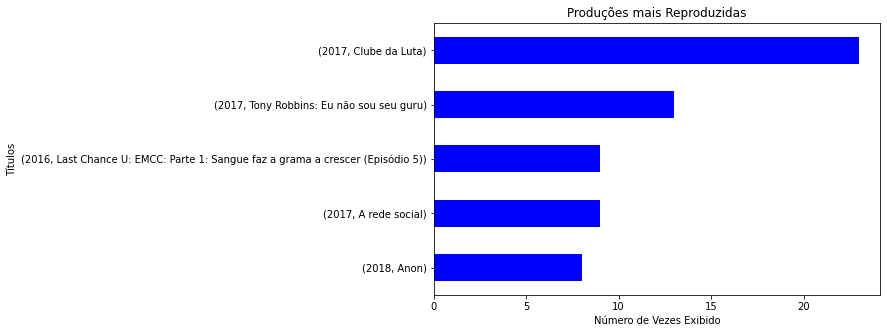

In [251]:
# Filmes mais reproduzidos (TOP 5)
# definir tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,5)) 

# plotando o gráfico
data = df_eric.groupby(['Year'])['Title'].value_counts().sort_values(ascending=False)[0:5]
data = data.sort_values(ascending=True) # reordenar os dados em ordem decrescente
data.plot(kind='barh', color='blue')
plt.title('Produções mais Reproduzidas')
plt.xlabel('Número de Vezes Exibido')
plt.ylabel('Títulos')

# alinhar rótulos do eixo X na diagonal
plt.xticks(rotation=0)

plt.show();

Como discutimos lá em cima, aqui é apresentado o número de vezes que a produção foi reproduzida, não importa se foi em seu tempo total ou não.

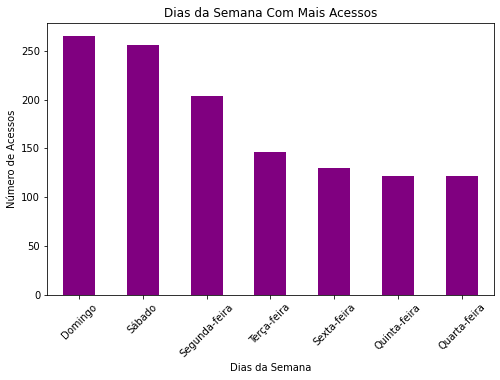

In [252]:
# dias da semana com mais acessos
# definir tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,5)) 

# plotando o gráfico
data = df_eric['Weekday'].value_counts()
data.plot(kind='bar', color='purple')
plt.title('Dias da Semana Com Mais Acessos')
plt.xlabel('Dias da Semana')
plt.ylabel('Número de Acessos')

# alinhar rótulos do eixo X na diagonal
plt.xticks(rotation=45)

plt.show();

Foram as finais de semana que mais desfrutei da plataforma, Domingo e Sábado foram os dias que mais acessei a Netflix.

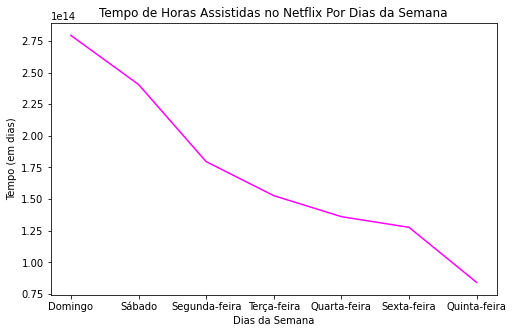

In [253]:
# tempo de horas assistidas no netflix por dias da semana
# definir tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,5)) 

# plotando o gráfico
data = df_eric.groupby(['Weekday'])['Duration'].sum().sort_values(ascending=False)
data.plot(kind='line', color='magenta')
plt.title('Tempo de Horas Assistidas no Netflix Por Dias da Semana')
plt.xlabel('Dias da Semana')
plt.ylabel('Tempo (em dias)')

# alinhar rótulos do eixo X na diagonal
plt.xticks(rotation=0)

plt.show();

Seguindo a tendência do número de acessos, o final de semana é o período que mais gastei horas na plataforma.

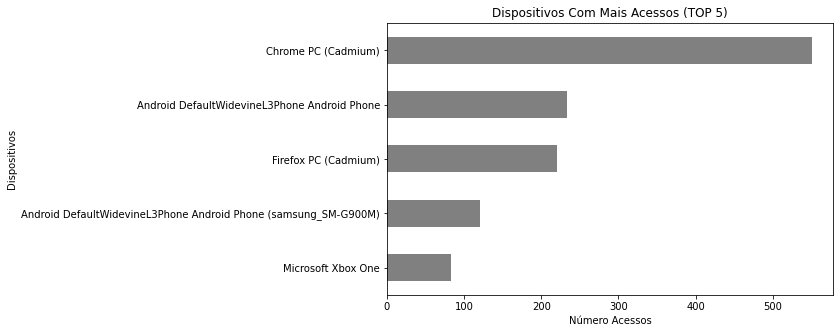

In [254]:
# dispositivos com mais acessos (TOP 5)
# definir tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,5)) 

# plotando o gráfico
data = df_eric['Device Type'].value_counts()[0:5]
data = data.sort_values(ascending=True) # reordenar os dados em ordem decrescente
data.plot(kind='barh', color='Gray')
plt.title('Dispositivos Com Mais Acessos (TOP 5)')
plt.xlabel('Número Acessos')
plt.ylabel('Dispositivos')

# alinhar rótulos do eixo X na diagonal
plt.xticks(rotation=0)

plt.show();

É no meu laptop onde mais acesso o Netflix, isso fica claro quando dos 3 primeiros colocados, 2 apresentam os navegadores Google Chrome e Firefox. Em segundo lugar aparece um dos meus smartphones, os outros dispotivos aparecem na sequência, sendo o 4º lugar um smartphone também.

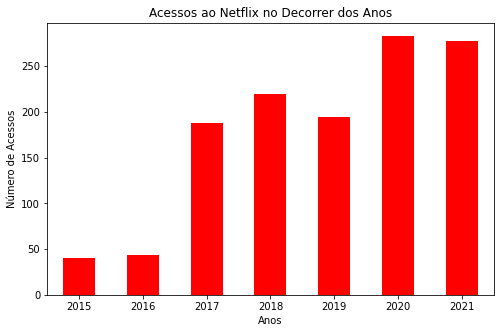

In [256]:
# acessos ao netflix ao decorrer dos anos
# definir tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,5)) 

# plotando o gráfico
data = df_eric['Year'].value_counts().sort_index()
data.plot(kind='bar', color='red')
plt.title('Acessos ao Netflix no Decorrer dos Anos')
plt.xlabel('Anos')
plt.ylabel('Número de Acessos')

# alinhar rótulos do eixo X na diagonal
plt.xticks(rotation=0)

plt.show();

Depois de mais de 200 acessos no ano de 2018, esse crescimento foi interrompido em 2019 quando os números cairam bastante, mas nos anos de 2020 a 2021 os números acessos voltaram a crescer e ultrapassaram os 250 acessos. 

Podemos dar esse crescimento de acessos ao evento da pandemia, já que por solicitações maiores ficamos mais tempo em casa.

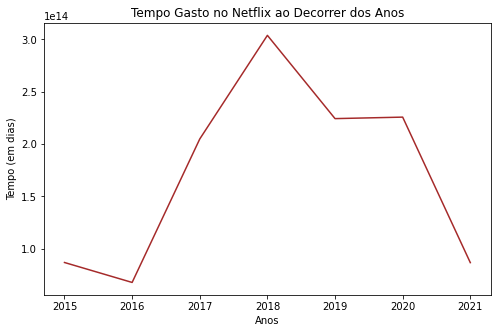

In [260]:
# tempo de horas assistidas no netflix ao decorrer dos anos
# definir tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,5)) 

# plotando o gráfico
data = df_eric.groupby(['Year'])['Duration'].sum()
data.plot(kind='line', color='brown')
plt.title('Tempo Gasto no Netflix ao Decorrer dos Anos')
plt.xlabel('Anos')
plt.ylabel('Tempo (em dias)')

# alinhar rótulos do eixo X na diagonal
plt.xticks(rotation=0)

plt.show();

Assim como no número de acesso, 2019 apresentou bastante queda no número de tempo gasto na plataforma, já que 2018 havia batido mais de 36 horas. 
Em 2020 as coisas deram uma leve melhorada, mas longe do que tinha sido gasto em 2018.
Em 2021 é apresentado pouquissímo tempo gasto na plataforma, mas como vimos em nossa análise, não temos todo o ano de 2021, já que nosso último acesso a a plataforma foi em 23 de setembro do mesmo ano.

Para finalizar nossa análise, vamos visualizar uma **nuvem de palavras**, para assim identificar quais foram os títulos mais acessados no netflix.

Para isso, vamos usar a biblioteca `WorldCloud`, é fazendo o uso dela que vamos criar uma nuvem de palavras e para uma melhor acurácia das palavras a serem exibidas, vamos criar um dicionário com as palavras ou letras que devem ser ignoradas, assim visualizaremos somente as principais palavras do nosso perfil.

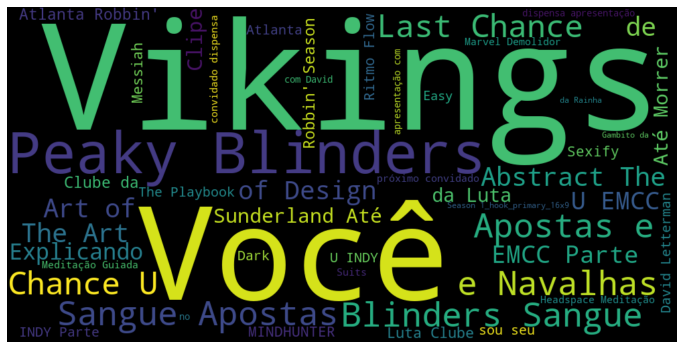

In [259]:
# gerando a nuvem de palavras
from wordcloud import WordCloud

# convertendo todo conteúdo da coluna Title em uma string
words = " ".join(review for review in df_eric.Title)

# lista de palavras ou letras que devem ser ignoradas
stopwords = set(["Episódio", "Temporada", "Trailer", "O"])

# gerando a nuvem de palavras, limitando somente a 50 palavras
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords, max_words=50).generate(words)

# plotar a nuvem de palavras
plt.figure(figsize=(12, 10)) # definir tamanho da figura
plt.imshow(wordcloud, interpolation='bilinear') # layout da nuvem de palavras
plt.axis("off")
plt.show()

O intuito da nuvem de palavras é identificar os títulos que mais apareceram em meu perfil. 
E fica o destaque para os títulos: **"Vikings", "Você", "Peaky Blinders"**, as 3 produções foram os títulos mais acessados no meu perfil e confesso que de fato foram as séries que mais assisti na plataforma, o que faz a análise bater com a minha percepção.

# Conclusão

O intuito desse notebook era fazer um análise exploratória, buscando identificar padrões e identificar o conteúdo consumido, sem intenção de criar qualquer tipo de modelo.

Identificamos que o ano que começamos a utilizar a platforma, a produção mais longa e mais curta, quantas produções já assistidas, o total de horas assistidas por anos e por semana e o período que estamos na plataforma. Além de identificarmos que em muitas produções a assistimos em várias etapas.

Descobrimos que temos um padrão no quesito do consumo, conseguimos identificar que tanto em números de acessos, quanto em números de horas é no final de semana que passo tempo na plataforma.

Identificamos que apresento ser um daqueles que passa muitos minutos para escolher um produção e em muitas vezes chega a rodar algumas delas por poucos segundos e depois desiste. (como vimos, esses segundos ficam registrados).

Posso dizer que estou muito feliz com o fim dessa análise, pois ela sanou quase toda minha curiosidade, essa que foi o principal motivo para essa análise dos dados.

Espero que tenham gostado, sou um cara que gosta de escutar bastante, então, caso tenha alguma dica, crítica ou sugestão estarei aqui de todo ouvidos, podem contar comigo.

*Me segue lá no Linkedin, de vez em quando estou sempre postando coisas bacanas por lá, segue o link: https://www.linkedin.com/in/eric-fruchi/*

Obrigado e Abraço!